In [170]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [171]:
Sales = pd.read_csv(r'C:\GitRepo\My-training-Slubik-Stanislav\Electronic_sales_Sep2023-Sep2024.csv')

print(Sales.info())
print(display(Sales.head(10)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
5,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,2024-05-26,Standard,"Impulse Item,Accessory",65.78
6,1005,25,Female,No,Smartwatch,SKU1003,3,Completed,Paypal,7603.47,844.83,9,2024-01-30,Overnight,NaN,0.00
7,1005,25,Female,No,Laptop,SKU1005,3,Completed,Debit Card,4175.64,463.96,9,2024-06-24,Overnight,"Extended Warranty,Extended Warranty",75.33
8,1006,24,Male,No,Smartphone,SKU1004,2,Cancelled,Debit Card,5538.33,791.19,7,2023-10-03,Standard,Impulse Item,43.05
9,1006,24,Male,Yes,Laptop,SKU1005,3,Completed,Cash,4175.64,463.96,9,2024-01-01,Express,NaN,0.00


None


In [172]:
'''Задание 1
На основании датасета для каждого покупателя получите:
 - предпочитаемый метод оплаты;
 - общие траты;
 - количество денег, потраченных на дополнительные услуги и аксессуары.
'''

'Задание 1\nНа основании датасета для каждого покупателя получите:\n - предпочитаемый метод оплаты;\n - общие траты;\n - количество денег, потраченных на дополнительные услуги и аксессуары.\n'

In [173]:
Sales['Payment Method'].unique()

array(['Credit Card', 'Paypal', 'Cash', 'Debit Card', 'Bank Transfer',
       'PayPal'], dtype=object)

In [174]:
Sales.groupby(['Customer ID', 'Payment Method']).size().reset_index(name='count').sort_values(by=['Customer ID','count'], ascending=[True, False])

,Customer ID,Payment Method,count
0,1000,Credit Card,1
1,1000,Paypal,1
2,1002,Cash,1
3,1002,Credit Card,1
4,1003,Cash,1
...,...,...,...
17146,19996,Bank Transfer,2
17147,19996,Credit Card,2
17148,19996,PayPal,2
17149,19997,Bank Transfer,1


In [175]:
Payment_Method = Sales.groupby(['Customer ID', 'Payment Method'])['Payment Method'].value_counts().unstack(fill_value=0)
print(Payment_Method)

Payment Method  Bank Transfer  Cash  Credit Card  Debit Card  PayPal  Paypal
Customer ID                                                                 
1000                        0     0            1           0       0       1
1002                        0     1            1           0       0       0
1003                        0     1            0           0       0       0
1004                        0     0            1           0       0       0
1005                        0     0            0           1       0       1
...                       ...   ...          ...         ...     ...     ...
19994                       1     0            0           0       0       0
19995                       0     0            1           0       0       0
19996                       2     0            2           0       2       0
19997                       1     0            0           0       0       0
19998                       1     0            0           0       0       0

In [176]:
max_count = Payment_Method.idxmax(axis=1)
print(max_count)

Customer ID
1000       Credit Card
1002              Cash
1003              Cash
1004       Credit Card
1005        Debit Card
             ...      
19994    Bank Transfer
19995      Credit Card
19996    Bank Transfer
19997    Bank Transfer
19998    Bank Transfer
Length: 12136, dtype: object


In [177]:
def pay_met(row):
# функция которая принимает на себя payment_metod, 
#а после возвращает либо наиболее часто используемый метод, 
# либо несколько если они равны наиболее часто применяемому методу.
    max_pay = row.max()
    pay_met = (col for col in Payment_Method.columns if row[col] == max_pay)
    
    
    return ','.join(pay_met)


preferred_method = Payment_Method.apply(pay_met, axis=1) # применение функции к каждой строке

print(preferred_method)

Customer ID
1000                   Credit Card,Paypal
1002                     Cash,Credit Card
1003                                 Cash
1004                          Credit Card
1005                    Debit Card,Paypal
                       ...               
19994                       Bank Transfer
19995                         Credit Card
19996    Bank Transfer,Credit Card,PayPal
19997                       Bank Transfer
19998                       Bank Transfer
Length: 12136, dtype: object


In [178]:
Sales.groupby(['Customer ID'])['Total Price'].sum() # Общие затраты

Customer ID
1000      6279.42
1002      5020.60
1003        41.50
1004        83.00
1005     11779.11
           ...   
19994     5504.87
19995     5394.56
19996    27296.78
19997     2528.26
19998      674.32
Name: Total Price, Length: 12136, dtype: float64

In [179]:
Sales.groupby(['Customer ID'])['Add-on Total'].sum() # Затраты на акссесуары

Customer ID
1000      66.30
1002      60.16
1003      35.56
1004      65.78
1005      75.33
          ...  
19994     93.17
19995      0.00
19996    432.12
19997    101.34
19998      0.00
Name: Add-on Total, Length: 12136, dtype: float64

In [180]:
'''Задание 2
1 На основании датасета получите доход:
 - по каждому методу доставки,
 - по каждому типу продукта,
 - по дополнительным услугам за каждый месяц,
 - по дополнительным услугам за каждый квартал.
2 Отобразите полученные данные на графике. '''

'Задание 2\n1 На основании датасета получите доход:\n - по каждому методу доставки,\n - по каждому типу продукта,\n - по дополнительным услугам за каждый месяц,\n - по дополнительным услугам за каждый квартал.\n2 Отобразите полученные данные на графике. '

In [181]:
print(Sales.info())
print(display(Sales.head(5)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


None


Text(0.5, 1.0, 'Доход по типу доставки')

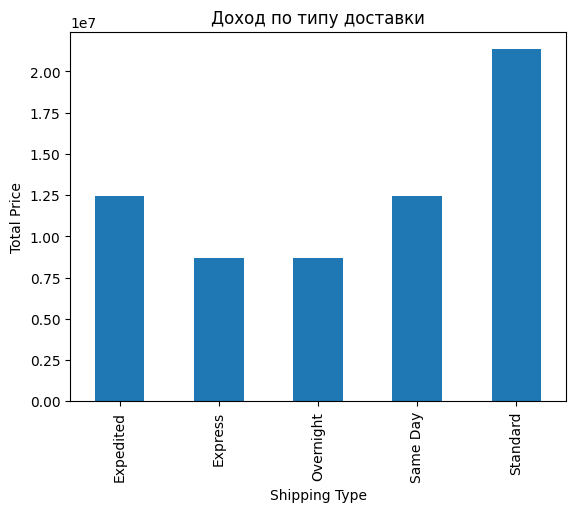

In [206]:
Sales.groupby(['Shipping Type'])['Total Price'].sum().plot(kind='bar') # Доход по типу доставки
plt.xlabel('Shipping Type')
plt.ylabel('Total Price')
plt.title('Доход по типу доставки')


Text(0.5, 1.0, 'Доход по типу продукта')

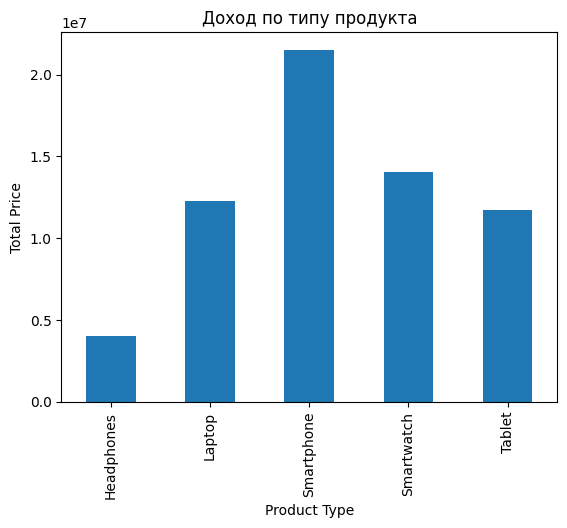

In [205]:
Sales.groupby(['Product Type'])['Total Price'].sum().plot(kind='bar')
plt.xlabel('Product Type')
plt.ylabel('Total Price')
plt.title('Доход по типу продукта')

Text(0, 0.5, '')

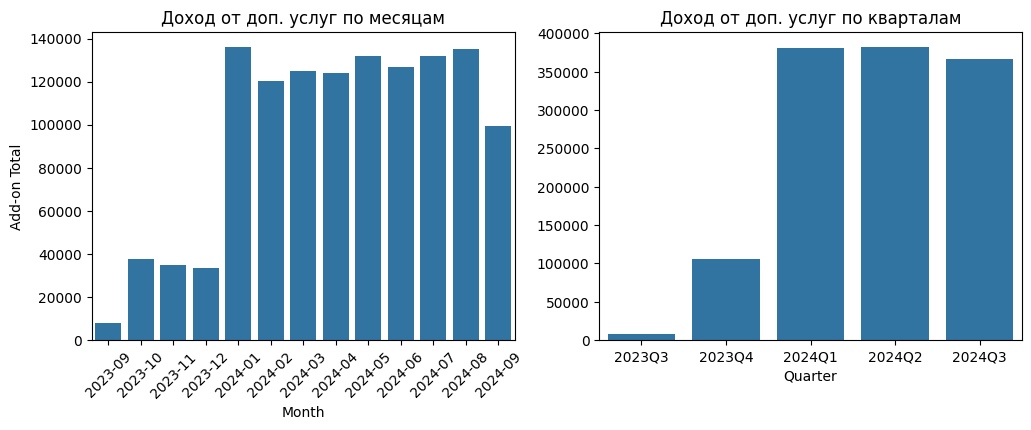

In [ ]:

Date = pd.to_datetime(Sales['Purchase Date'])
Sales['Month'] = Date.dt.to_period('M').astype(str)
Sales['Quarter'] = Date.dt.to_period('Q').astype(str)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


addon_querter = Sales.groupby('Quarter')['Add-on Total'].sum().reset_index()
addon_month = Sales.groupby('Month')['Add-on Total'].sum().reset_index()



def print_two_columns():
    pass



sns.barplot(data=addon_month, x='Month', y='Add-on Total',  ax = axes[0])
axes[0].set_title('Доход от доп. услуг по месяцам')
axes[0].tick_params(axis='x', rotation=45)




sns.barplot(data=addon_querter, x='Quarter', y='Add-on Total',  ax = axes[1])
axes[1].set_title('Доход от доп. услуг по кварталам')
axes[1].tick_params(axis='x')
axes[1].set_ylabel('')
